![alt text](images/HDAT9500Banner.PNG)
<br>

# Chapter 3: Model Evaluation and Improvement
# Exercise 1: Cross-Validation


# 1. Introduction



## 1.1. Aims of the Exercise:
 1. To become familiar with cross-validation <font color=green>**(Step 5 of the ML work-flow)**</font>

Useful readings:
1. A gentle introduction to k-fold cross-validation: https://machinelearningmastery.com/k-fold-cross-validation/
2. How to train a final machine learning model: https://machinelearningmastery.com/train-final-machine-learning-model/

It aligns with all of the learning outcomes of our course: 

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.
3.	Construct appropriate training and test sets for health research data.

**NB Nomeclature: **
Training, Validation and Test Set. 

* The training set, used to train the model
* The validation set, used to evaluate model performance and adjust model parameters accordingly (for example, the alpha for Ridge Regression). Therefore, the validation set is used as an intermediate step. 
* The test set, used for final model evaluation. Book 2 uses "the term validation set" for what we call "test set" in Book 1.


## 1.2. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.
 
## 1.3. Tips
 1. The square brackets on the left hand side of each cell indicate whether the cell has been executed or not. Empty square brackets mean that the cell has not been executed, whereas square brackets that contain a number means that the cell has been executed. Run all of the cells in sequence, using the "Run" button.
 2. To edit this notebook, just double-click in each cell. In the document, each cell can be a "Code" cell or "text-Markdown" cell. To choose between these two options, go to the combo-box above. 
 3. If you want to save your notebook, please make sure you press the "floppy disk" icon button above. 
 4. To clean the content of all cells and re-start Notebook, please go to Cell->All Output->Clear


In [1]:
import sys
print(sys.version)

import numpy as np
import pandas as pd
from IPython.display import display

from plotnine import *

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


![alt text](images/ML-work-flow.PNG)

# 2. Exploration of the Wisconsin Cancer Data Set

For data dictionary and all information:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 1:  Can you briefly describe the dataset in 10 lines? What are we trying to predict, that is, what is the research question (step 0 of our machine learning work-flow?)  </font>

<b> Write your answer here:</b>
#####################################################################################################################

(Double-click here)

...
#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

The tumour images look like this (source: ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/):

![alt text](images/image1.gif)
![alt text](images/image2.gif)
![alt text](images/image3.gif)
![alt text](images/image4.gif)

In [2]:
dataframe = pd.read_csv('data/breast-cancer-wisconsin-data/data.csv', sep=',')

## 2.1. Preparing Data (step 2): Visualization and Data Cleaning

In [3]:
# Sanity Check:
display(dataframe[:][:5])

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print(dataframe.shape)

(569, 32)


In [5]:
X = dataframe.drop(axis=1, columns=['id', 'diagnosis'])
y = dataframe['diagnosis']

In [6]:
# Sanity check
display(X[:5])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Sanity check
display (y[:5])

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

For the visualization part, we are going to use two libraries: matplotlib and seaborn. This is in addition to the one that we have already learnt, plotnine.

Let's get going to visualise all the features. 
We start visualizing the first 5 features. 

In [8]:
import matplotlib.pyplot as plt

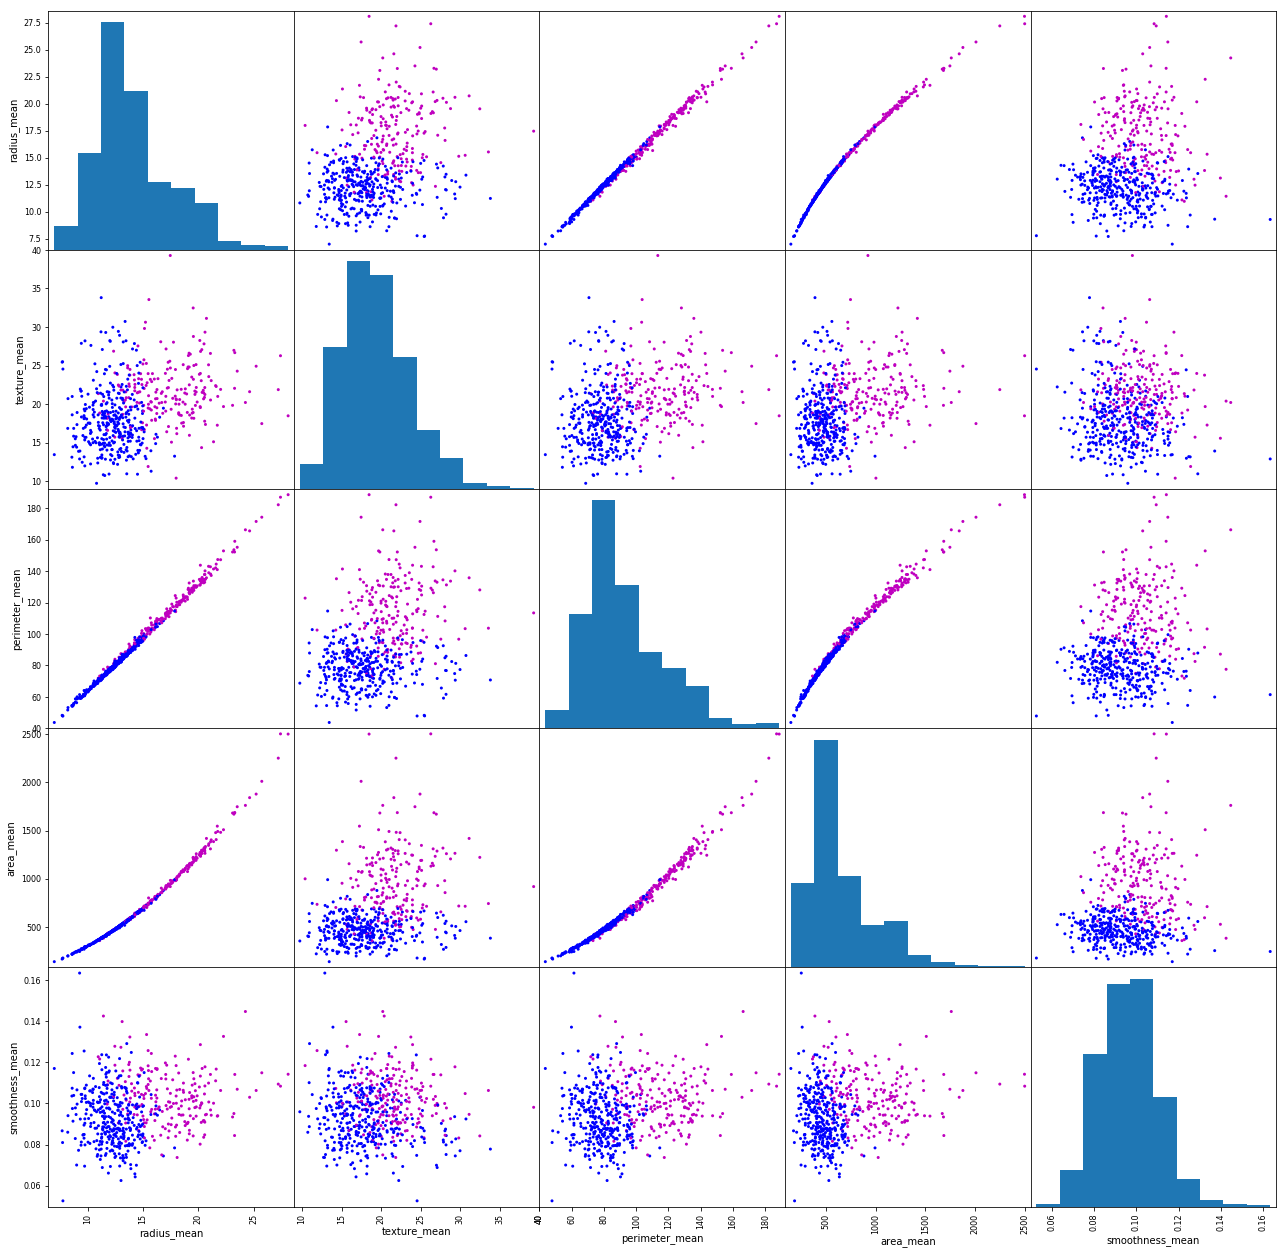

In [9]:
# help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
sm=pd.plotting.scatter_matrix(X.iloc[:, 0:5], c=dataframe.diagnosis, alpha=1, figsize=(22,22));

We change the font sizes for name labels and axes ticks. In addition, we rotate the labels 90 degrees.

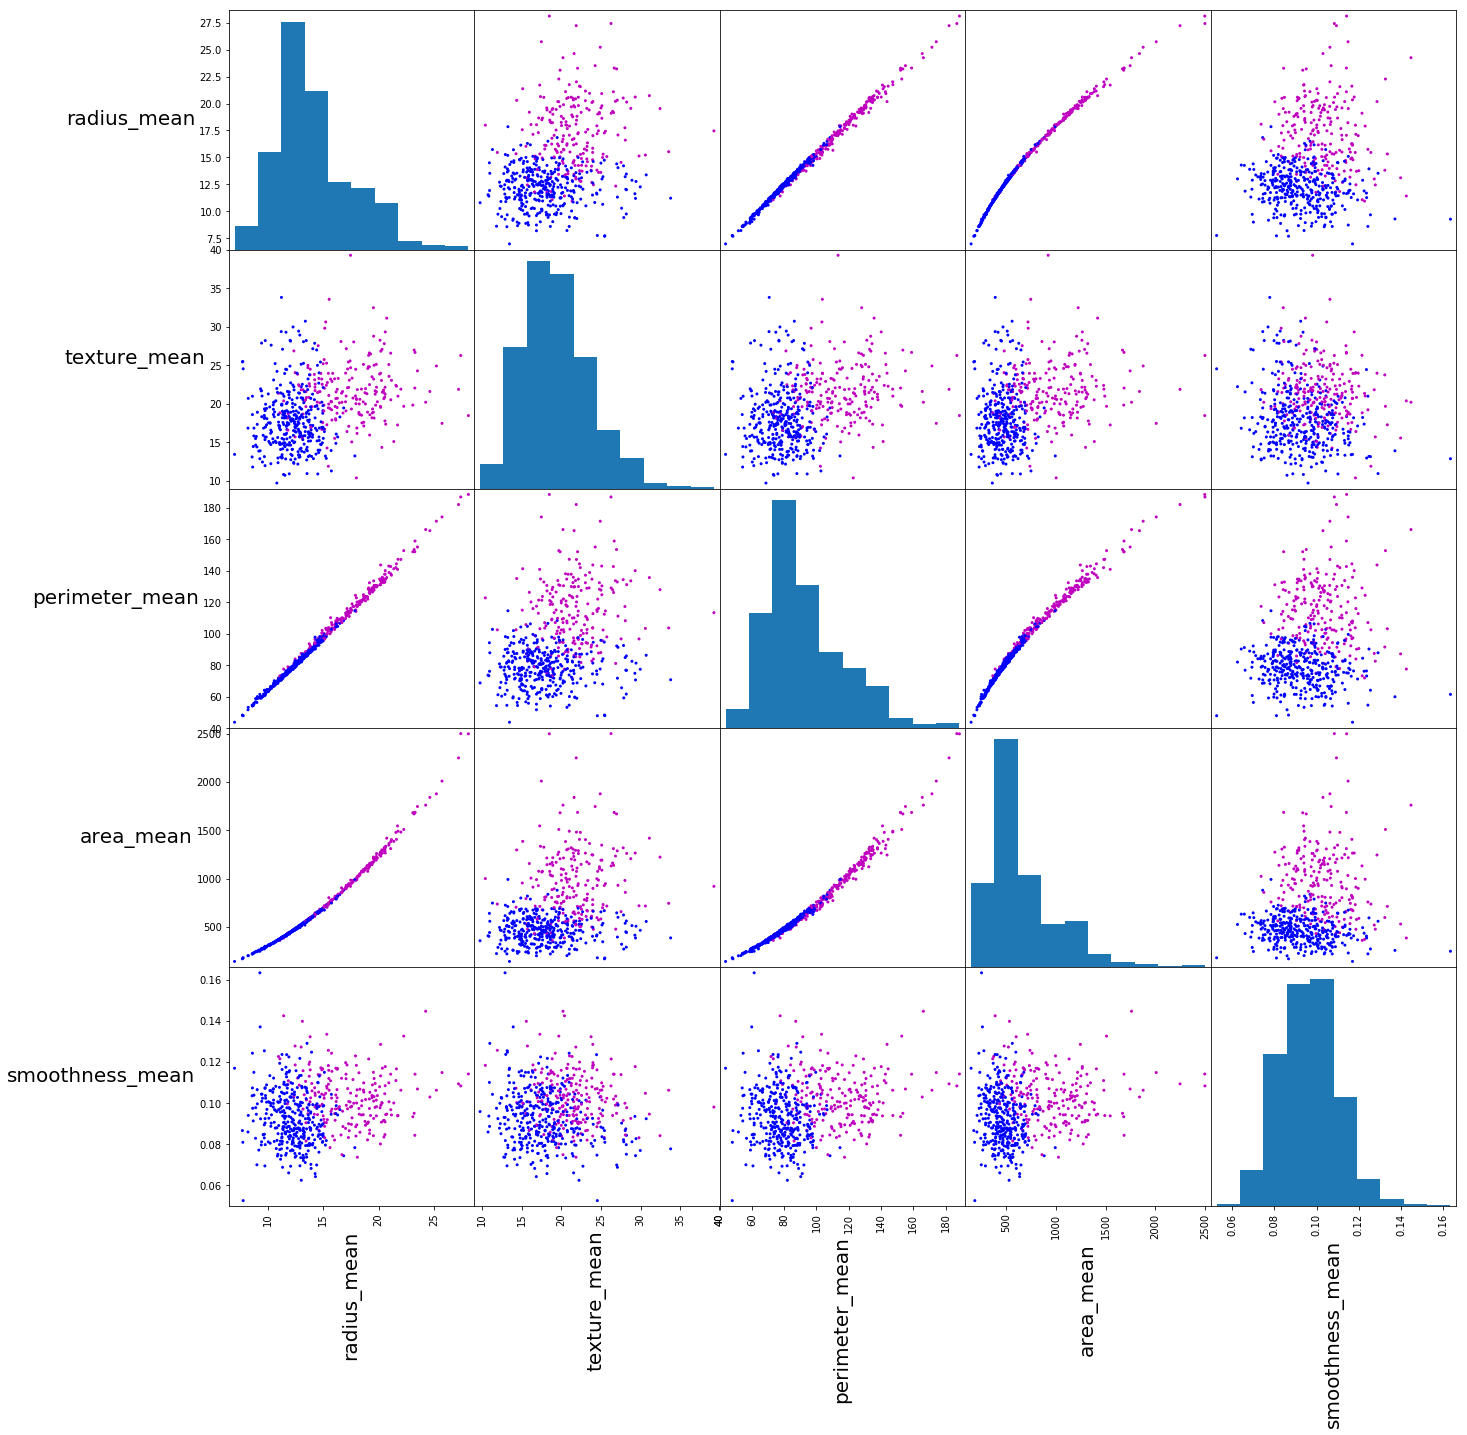

In [10]:
# help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

sm=pd.plotting.scatter_matrix(X.iloc[:, 0:5], c=dataframe.diagnosis, alpha=1, figsize=(22,22));

# Change labels and tickslabels sizes: 
# help: https://matplotlib.org/api/text_api.html#matplotlib.text.Text

#y ticklabels
a=[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#x ticklabels
b=[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#y labels
c=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in sm.ravel()]
#x labels
d=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in sm.ravel()]

for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xlabel(ax.get_xlabel(), rotation=90)
    plt.ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right')


We can now plot the whole dataset (30 columns) - it will take a little while:

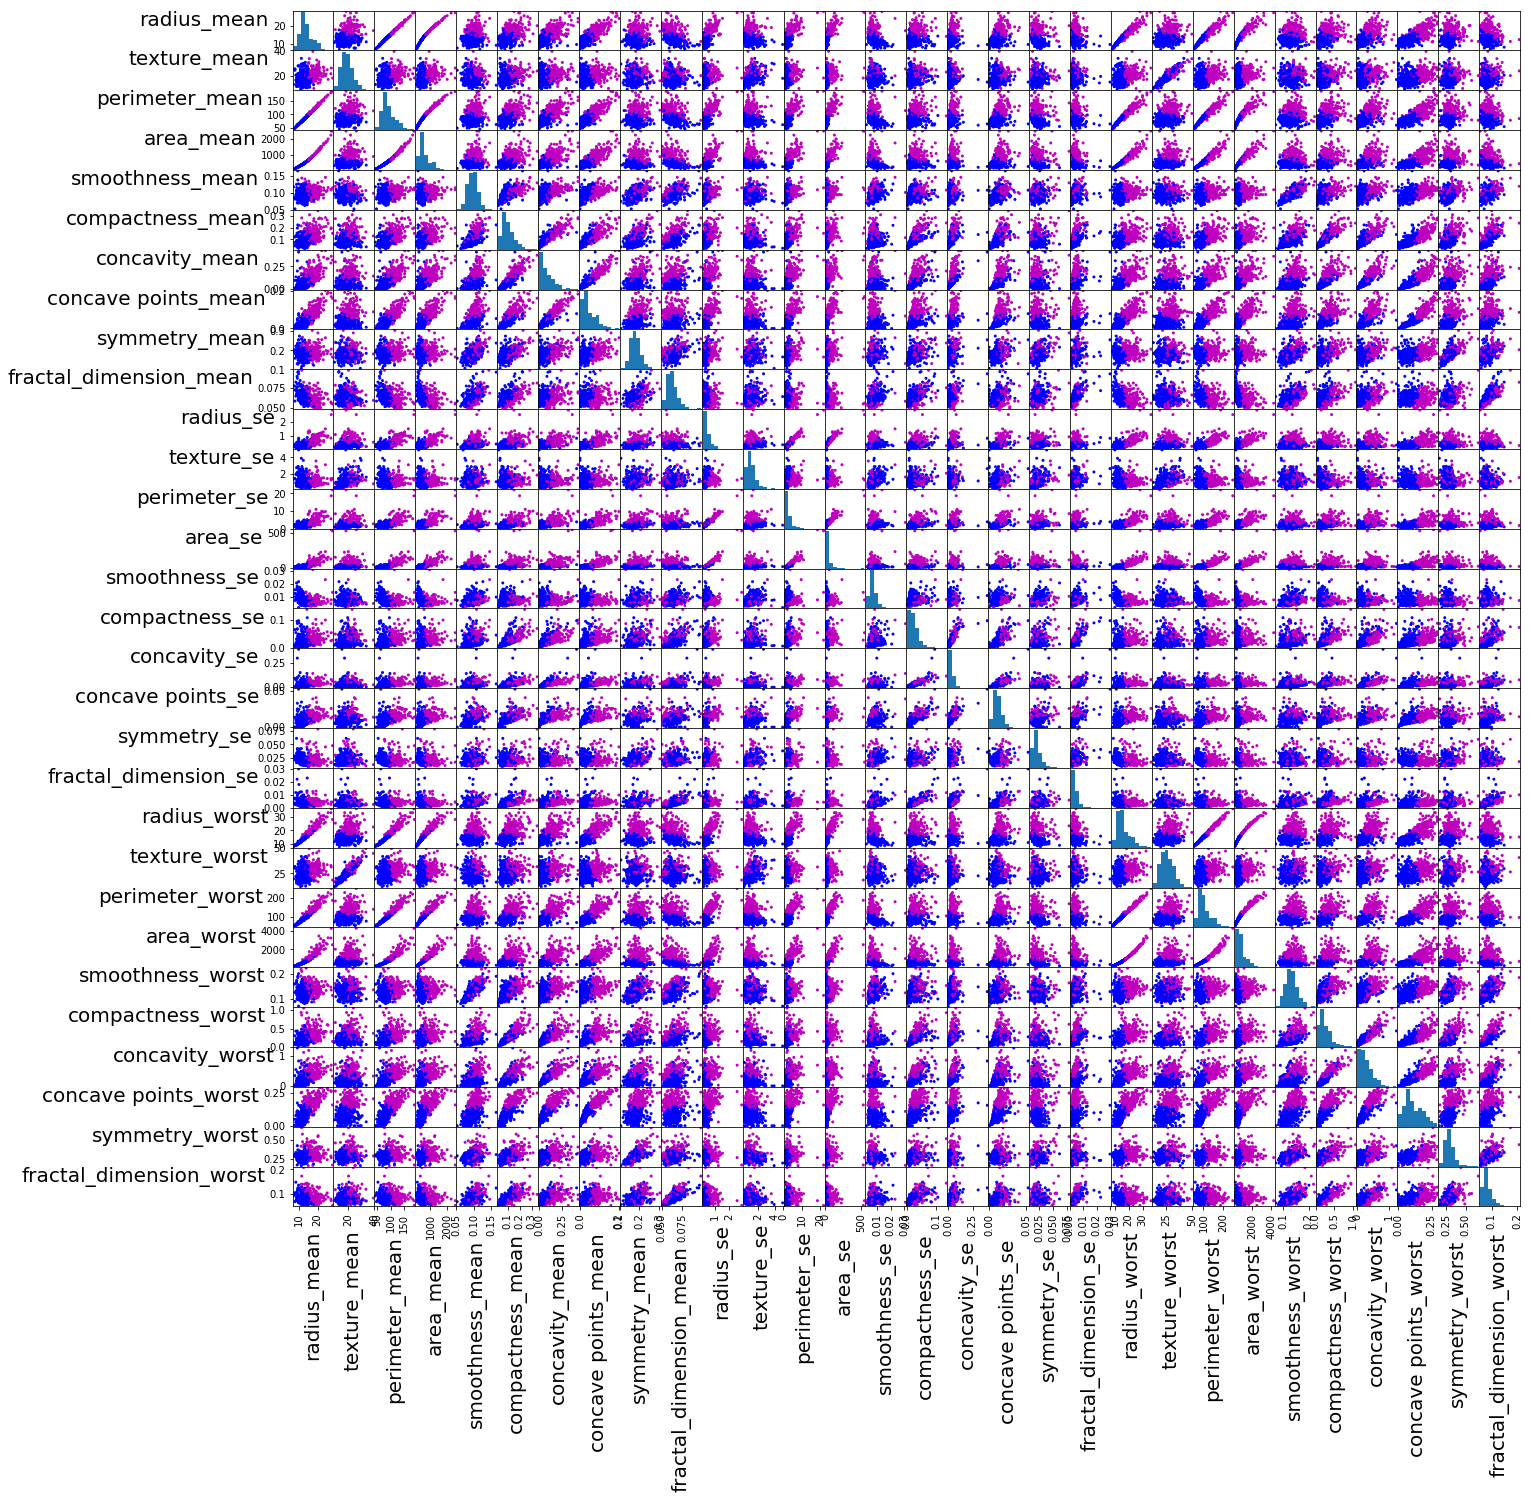

In [11]:
# help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
sm=pd.plotting.scatter_matrix(X.iloc[:, 0:31], c=dataframe.diagnosis, alpha=1, figsize=(22,22));

# Change labels and tickslabels sizes: 
# help: https://matplotlib.org/api/text_api.html#matplotlib.text.Text
#y ticklabels
a=[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#x ticklabels
b=[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#y labels
c=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in sm.ravel()]
#x labels
d=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in sm.ravel()]

for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xlabel(ax.get_xlabel(), rotation=90)
    plt.ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right')

Correlation between continous features:

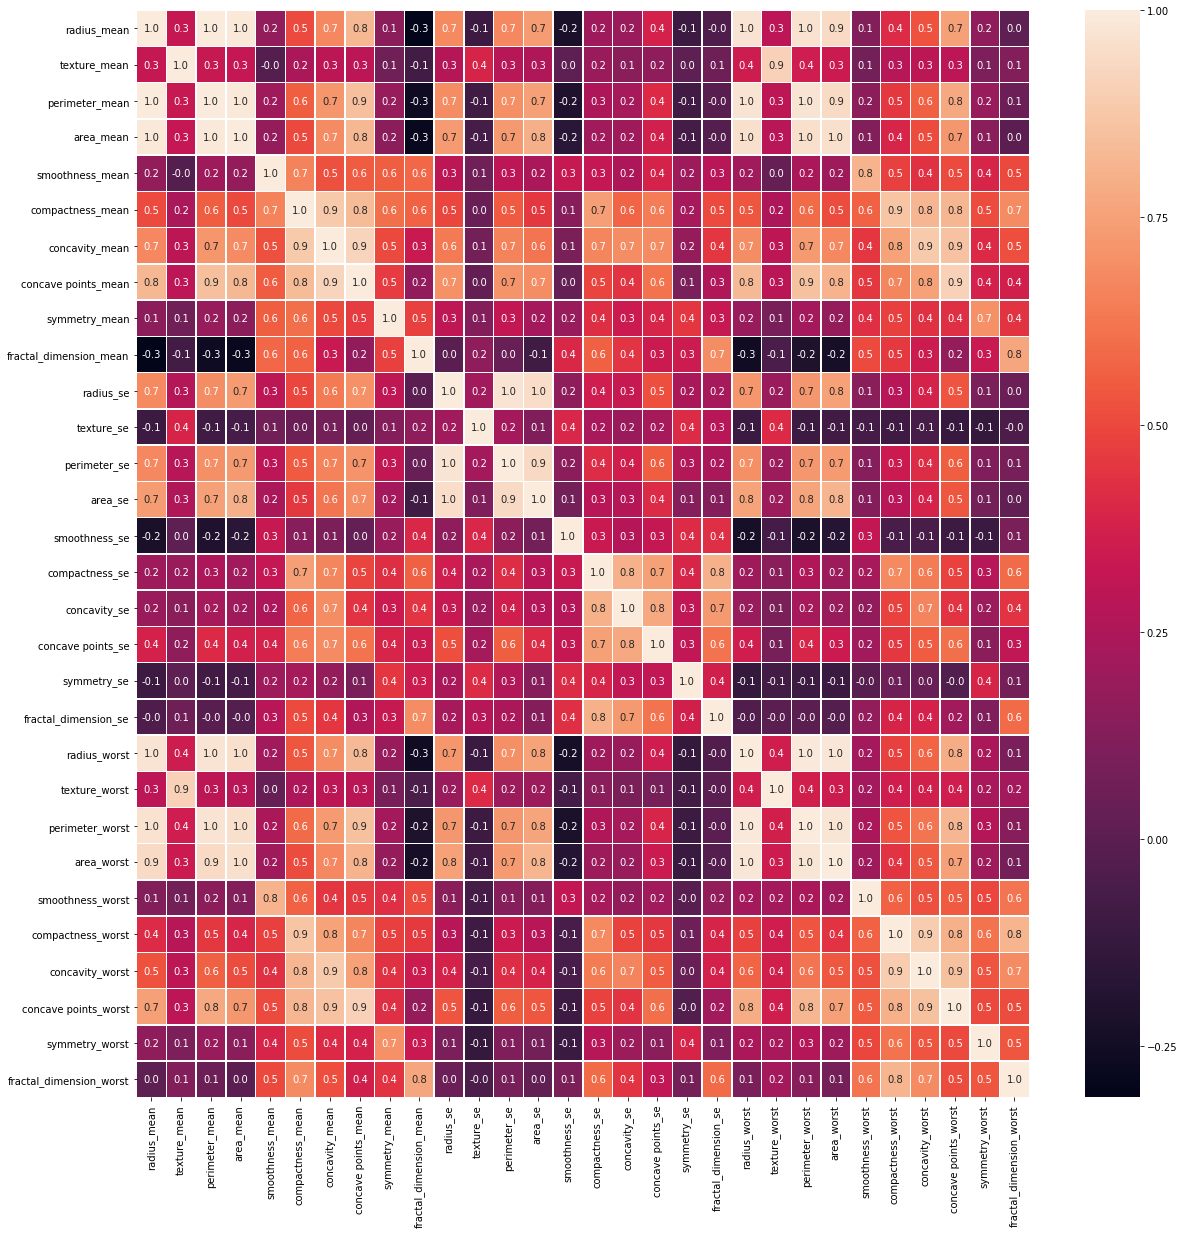

In [12]:
import seaborn as sns

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 2:  Can you give an example of two features that are highly correlated and two features that are not correlated?  </font>

<b> Write your answer here:</b>
#####################################################################################################################
higly correlated:
radius worst and area worst
perimeter mean and concave point mean

low correlation:
smoothness_se and perimeter worst
texture_se and area mean

...
#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

In [13]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Number of Benign:  357
Number of Malignant :  212


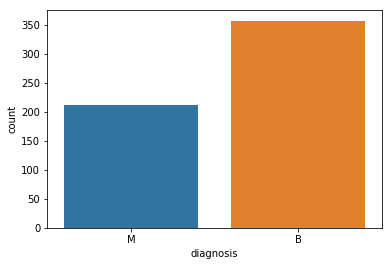

In [14]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
# https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

This dataset is not as imbalanced as the "diabetes" dataset.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

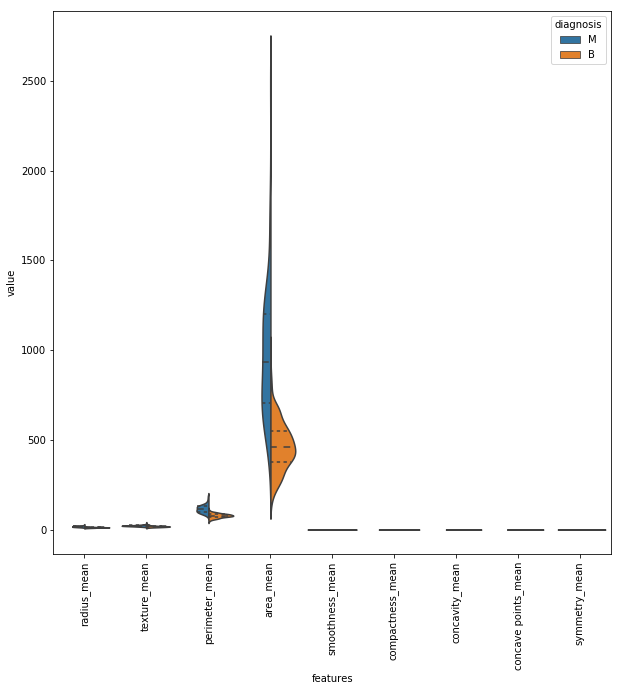

In [15]:
# first ten features

data = pd.concat([y,X.iloc[:, 0:9]],axis=1)
data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 3:  Check the previous plot. We can see clearly why we have to standardize features, or more generally scale features. Can you explain why?  </font>


<p><font color='green'> Tip: I really enjoyed reading the Wikipedia entry, in case you want to know a bit more about feature scaling in general:
https://en.wikipedia.org/wiki/Feature_scaling</font></p>

<b> Write your answer here:</b>
#####################################################################################################################

(Double-click here)

...
#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>

## 2.2. Preparing Data (step 2):  Standardization (Scaling of the Features) 

We are going to standardize the features in order to see how they look with the same scale. **We are not going to use the standardize features just yet for anything but <font color=green>visualization.</font>**

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#The standard score of a sample x is calculated as:
#z = (x - u) / s
#where u is the mean of the training samples, and s is the standard deviation of the training samples.

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()


Remember that we have to apply the StandardScaler() to the training set ONLY. Nevertheless, this is just for visual purposes, so we are going to apply it to the whole data.

In [17]:
# rescale the training data, or the whole data in this case. Just for visual purposes
scaler.fit(X)
X_scaled_temp = scaler.transform(X)

In [18]:
# create DataFrame from X_scaled_temp array that contains the column names of the original dataset
X_scaled=pd.DataFrame(X_scaled_temp, columns = list(X.columns.values))

In [19]:
# Sanity check
X_scaled[:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

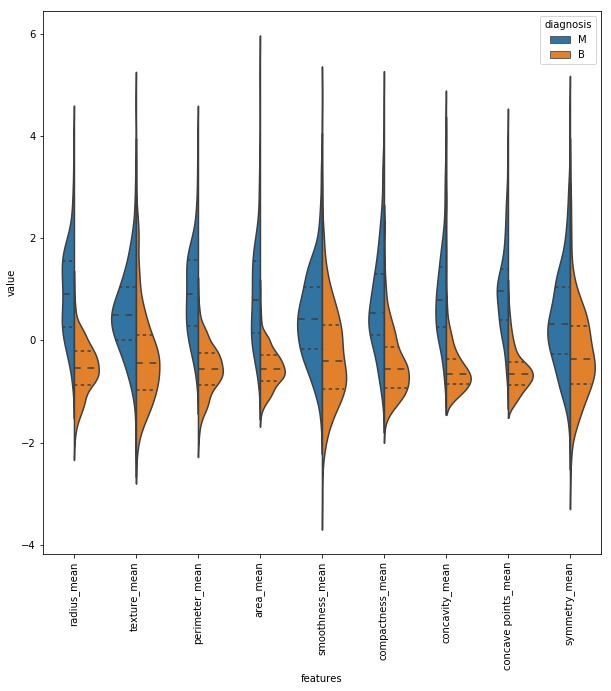

In [20]:
# first ten features
import seaborn as sns
data = pd.concat([y,X_scaled.iloc[:, 0:9]],axis=1)
data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

As you can see, all the features are at the same scale now and it will be easier for the ML algorithm to fit a model to predict the correct outcome.

We are not going to scale the features just yet because the process is a bit more complicated in the case of applying cross-validation.

# 3. Cross-Validation
To this point, we have restrained ourselves to using the training-test approach for <b>model performance evaluation</b>. As you are aware, the training-test approach involves partitioning the data into two sets, one for training and one for testing. The advantage of the training-test approach is that it is simple to understand and implement. However, estimates of test error can be highly variable, with dependence on which records are selected for training and testing.


Here, we will introduce to you another related **method of model performance evaluation** known as "k-fold cross-validation". In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples, called **folds**. Of the k folds, a single fold is designated as the test set, and the remaining k-1 folds are used as training data. Now, here is where the method differs from the training-test approach. Previously, we would train a single model on a "training fold", evaluate on the "test fold", and then finish. Instead, now we train k models, each with a different test fold, and then average the performance to yield our final accuracy. It is common to choose k as either 5 or 10.<p>
    
To illustrate, consider the case of 5-fold cross-validation. Here, we split the data into 5 equally sized folds. Let's call them fold_1, fold_2, fold_3, fold_4, and fold_5. Then, choose one of the folds as the first test fold, and the remaining 4 folds are the training folds. Let's say we choose fold_1 for the first test fold, so we have fold_2, fold_3, fold_4, and fold_5 for training. Now, train and evaluate the first model using these folds. Let's call this model and its results model_1.<p> Now, we swap the test fold of fold_1 with a training fold that has not previously been used for testing. Let's say we swap fold_1 with fold_2. This means we have fold_2 as our new test fold, and we have fold_1, fold_3, fold_4, and fold_5 for training. Now, train and evaluate the second model and call it model_2.<p>

Repeat this process until we have used all 5 of our folds for testing exactly once. We would now have 5 models and their associated performance evaluation results (either F1 score, accuracy,...), model_1, model_2, model_3, model_4, and model_5. We then average these results. 

## 3.1. Cross-Validation: standard logistic regression

Here we will demonstrate k-fold cross-validation for our data, to evaluate the performance of standard logistic regression with class weights. To do so, we use "cross_val_score" (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). This method takes as inputs the model we wish to fit, the features we will use as predictors, and the response variable. The output is an array of model performance scores. <p> 
    **Note** that the cross-validation used is a special kind known as **stratified** k-fold cross-validation. **Stratified** means that each fold maintains the proportion of M:B (1/0) cases as in the original data. 
    
Read the scikit-learn website: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
Read "field cv":
**For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.**

**Note:<font color=green> very very very important </font>:
Be mindful that cross-validation is <font color=green>not</font> a way to build a model, it is only a<font color=green> method to evaluate</font> the performance of a given model in order to test or validation its generalization.**

### 3.1.1. Splitting the feature variables from the response

In [21]:
# We did this before, but we are going to do it again.

X = dataframe.drop(axis=1, columns=['id', 'diagnosis'])
y = dataframe['diagnosis']

In [22]:
# Sanity Check
display(X[:][:5])
X.shape

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 30)

### 3.1.2. Binarise the response:

In this case, we will use "y_binary" vector. Therefore, the classes in our dictionary will be 0 and 1 (instead of 'B' and 'M').

In [23]:
# Sanity Checks:
print('******************************************')
#print(y)
print('y - NO values =', sum(i =='B' for i in y))
print('y - YES values =', sum(i =='M' for i in y))
print('******************************************\n')

# Create y_binary
y_binary = [0 if x=='B' else 1 for x in y]


# Sanity Check
print('A few elements of y: ', y[:12].ravel())
print('Corresponding elements of y_binary: ', y_binary[:12])

# Sanity Checks:
print('\n******************************************')
#print(y)
print('y_binary - 0 values =', sum(i ==0 for i in y_binary))
print('y - 1 values =', sum(i ==1 for i in y_binary))
print('******************************************')

******************************************
y - NO values = 357
y - YES values = 212
******************************************

A few elements of y:  ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
Corresponding elements of y_binary:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

******************************************
y_binary - 0 values = 357
y - 1 values = 212
******************************************


In [24]:
# Sanity Check
print(y_binary)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

In [25]:
# Sanity Check
print (y)

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


# 3.2. Cross-Validation + Pipelines:

Recall that for regularization to be meaningful, we require the features to be <b>standardised</b>, and that we must fit the standardiser on the <b>*training set only*</b>, and then apply it to the test set. With cross-validation, the training and test set changes at each iteration. This means we must fit the scaler for each new training set in each iteration. We will achieve this by using a **pipeline**.<p> 
        **Pipelines** allow us to sequentially perform a list of transformations and a final estimator. In our case, we wish to apply the standardisation transformation, and then the logistic regression estimator.<p>
            If we use a pipeline to make a cross-validated estimator using cross_val_score, then the StandardScaler will estimate the parameters for centering and rescaling to unit variance only on the training folds. When evaluating the pipeline on the test fold, the StandardScaler will use the stored means and standard deviations, and subtract the training mean from the test set and divide the result by the training standard deviation. So even in the pipeline, the StandardScaler will not use the test set in any way to determine mean and variance of the data.
  

To read about Pipelines:
1. https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
2. https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976


### 3.2.1. Define our pipeline and then use cross-validation

The default penalty is L2-norm (Ridge), but feel free to change to L1-norm (Lasso). In addition, feel free to change the value of  𝐶=𝑎𝑙𝑝ℎ𝑎 . If you wish to change these parameters, do it after you finish this exercise.

Do you remember last week's assessment? We gave some weights associated with classes for readmission 'YES' and 'NO' in order to correct the imbalance in the data set. We can do the same here if we wish. I am going to the give the same value to the two classes, but feel free to experiment and change the values when you have finished this exercise: class_weight_dict={0:0.5, 1:0.5}. This is equivalent to give no weights. I just want to show you how to program it

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.pipeline import Pipeline 

In [28]:
# Scaler/Standardization
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

# Classification Model
class_weight_dict={0:0.5, 1:0.5}
Log_Reg = LogisticRegression(C = 0.5, penalty = 'l2', class_weight = class_weight_dict)

# PipeLine
pipe = Pipeline([('Transform', Scaler), ('Estimator', Log_Reg)])

We are going to start using the function "cross_val_score", which is the scikit-learn function that Book 1 uses. We can read the API (application programming interface) here:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [29]:
# Cross-validation (cross_val_score) + Pipeline, accuracy performance metric, and features with standardization (wst)
# Be patient, it takes some time :-):

from sklearn.model_selection import cross_val_score 
cv_acc_wst = cross_val_score(pipe, X, y_binary, cv = 3)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Check the field "scoring". As you can read, only a single metric is permitted.
If this field is "None", the estimator’s default scorer (if available) is used.

For LogisticRegression in scikit learn, the default scorer is "accuracy". Check the section "methods", the field "score":
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
print("Cross-validation accuracy scores:\n {}".format(cv_acc_wst))
print("Average cross-validation score: {:.4f}".format(cv_acc_wst.mean()))

Cross-validation accuracy scores:
 [0.97894737 0.97894737 0.97883598]
Average cross-validation score: 0.9789


Let's print the previous results (**cv_acc**), without standardization:

### 3.2.2. Cross_validate + standardization

Let's repeat the analysis using the function <font color=green>"cross_validate"</font> and "standarization". **The function <font color=green>"cross_validate"</font> allows us to use more than one metric at a time.**

<div class="alert alert-block alert-success">**Start Activity**</div>

### <font color='blue'> Question 4:  Write the function that calculates the 5-CV using "cross_validate"+ standardised features with Pipelines. Compute accuracy, recall, precision, auc and f1 scores.  </font>

Documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [49]:
# Write Python code here:

# Scaler/Standardization
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

# Classification Model
class_weight_dict={0:0.5, 1:0.5}
Log_Reg = LogisticRegression(C = 0.5, penalty = 'l2', class_weight = class_weight_dict)

# PipeLine
pipe = Pipeline([('Transform', Scaler), ('Estimator', Log_Reg)])

# Scores: accuracy, recall, precision, f1 & roc_auc
from sklearn import metrics
scoring = ['accuracy_score', 'recall_score', 'precision_score', 'f1_score', 'roc_auc_score']

# cross_validate + Pipeline, all scores defined above, features with standardization (wst)
from sklearn.model_selection import cross_val_score 
cv_acc_wst = cross_val_score(pipe, X, y_binary, scoring=scoring, cv = 5)




ValueError: scoring value should either be a callable, string or None. ['accuracy_score', 'recall_score', 'precision_score', 'f1_score', 'roc_auc_score'] was passed

### <font color='blue'> Question 5:  Can we compare the current results against those without standardization?  </font>

In [ ]:
# Write Python code here:

# Print accuracy for the k-folds and mean of the k-folds

# Print recall for the k-folds and mean of the k-folds

# Print precision for the k-folds and mean of the k-folds

# Print f1 for the k-folds and mean of the k-folds

# Print auc_roc for the k-folds and mean of the k-folds

<b> Write your answer here:</b>
#####################################################################################################################

(Double-click here)


#####################################################################################################################

<div class="alert alert-block alert-warning">**End Activity**</div>